In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")
# set max_colwidth of cell pandas dataframe to show full dataframe
pd.set_option('display.max_colwidth', -1)

In [3]:
loan_df = pd.read_csv("./data/clean_loan.csv")
loan_df.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating_Alpha,ProsperRating_Numeric,ProsperScore,...,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors,IsBorrowerHomeowner
0,2012-04-10 09:14:46.297,36,Defaulted,2012-12-19,0.35797,0.3177,0.3077,HR,1.0,5.0,...,0.0,"$50,000-74,999",5500.000000,140,4000,2012-04-19,173.71,-9.81,10,True
1,2013-04-22 13:29:19.073,36,Defaulted,2013-12-26,0.28032,0.2419,0.2319,D,3.0,5.0,...,0.0,"$25,000-49,999",2500.000000,193,2000,2013-04-26,78.67,-4.89,30,False
2,2013-02-12 18:07:31.690,60,Completed,2013-10-22,0.30748,0.2809,0.2709,E,2.0,3.0,...,0.0,"$25,000-49,999",3885.916667,0,4000,2013-02-21,124.76,-25.81,37,False
3,2010-06-16 16:23:44.533,36,Completed,2013-07-03,0.11296,0.0920,0.0820,A,6.0,9.0,...,0.0,"$75,000-99,999",6666.666667,0,4000,2010-06-24,0.00,-64.62,121,True
4,2012-01-30 17:59:17.200,36,Completed,2012-12-19,0.12782,0.0999,0.0899,A,6.0,9.0,...,42488.0,"$25,000-49,999",3750.000000,0,10000,2012-02-07,322.62,-68.22,30,False


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25992 entries, 0 to 25991
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingCreationDate        25992 non-null  object 
 1   Term                       25992 non-null  int64  
 2   LoanStatus                 25992 non-null  object 
 3   ClosedDate                 25992 non-null  object 
 4   BorrowerAPR                25992 non-null  float64
 5   BorrowerRate               25992 non-null  float64
 6   LenderYield                25992 non-null  float64
 7   ProsperRating_Alpha        25992 non-null  object 
 8   ProsperRating_Numeric      25992 non-null  float64
 9   ProsperScore               25992 non-null  float64
 10  ListingCategory_Numeric    25992 non-null  int64  
 11  BorrowerState              25992 non-null  object 
 12  Occupation                 25992 non-null  object 
 13  EmploymentStatus           25992 non-null  obj

In [11]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Term,25992.0,37.999077,10.575528,12.00000,36.000000,36.000000,36.000000,60.000000
BorrowerAPR,25992.0,0.251491,0.090386,0.04583,0.173590,0.268340,0.335530,0.423950
BorrowerRate,25992.0,0.219606,0.084177,0.04000,0.146900,0.231000,0.295800,0.360000
LenderYield,25992.0,0.209591,0.084181,0.03000,0.136900,0.221000,0.285800,0.340000
ProsperRating_Numeric,25992.0,3.663396,1.814511,1.00000,2.000000,3.000000,5.000000,7.000000
ProsperScore,25992.0,6.267313,2.319193,1.00000,5.000000,6.000000,8.000000,11.000000
ListingCategory_Numeric,25992.0,3.754694,4.109566,0.00000,1.000000,2.000000,7.000000,20.000000
AmountDelinquent,25992.0,995.854494,7179.725855,0.00000,0.000000,0.000000,0.000000,327677.000000
StatedMonthlyIncome,25992.0,5491.003507,6825.602083,0.00000,3166.666667,4583.333333,6666.666667,618547.833333
LoanCurrentDaysDelinquent,25992.0,116.259926,253.927546,0.00000,0.000000,0.000000,0.000000,1593.000000


In [8]:
loan_df.describe(include=object).T

,count,unique,top,freq
ListingCreationDate,25992,25979,2013-09-09 13:15:21.327,2
LoanStatus,25992,3,Completed,19651
ClosedDate,25992,1452,2014-03-04,104
ProsperRating_Alpha,25992,7,D,5867
BorrowerState,25992,48,CA,3305
Occupation,25992,67,Other,6756
EmploymentStatus,25992,7,Employed,16479
IncomeRange,25617,6,"$25,000-49,999",8319
LoanOriginationDate,25992,1143,2011-08-31,133


In [5]:
base_color = sns.color_palette()[0]
plt.rcParams["figure.figsize"] = (12, 8)

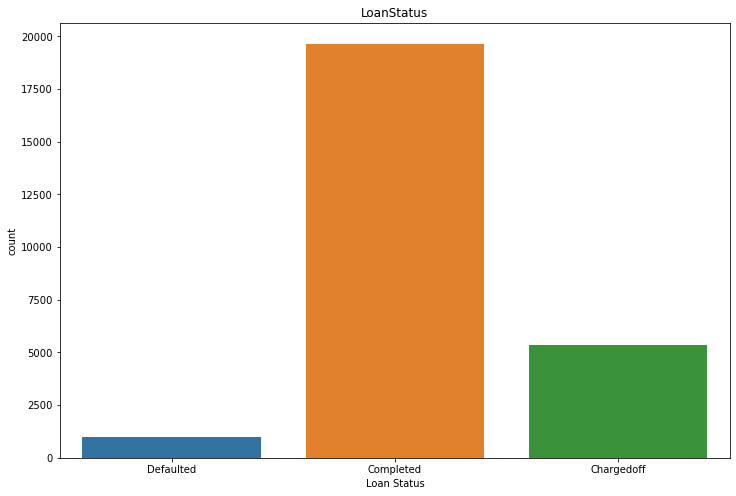

In [9]:
sns.countplot(data=loan_df,x= 'LoanStatus')
plt.title('LoanStatus')
plt.xlabel('Loan Status');

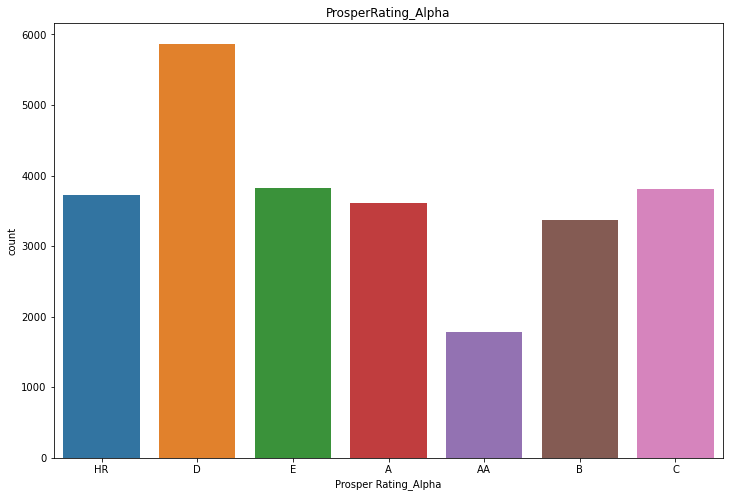

In [10]:
sns.countplot(data=loan_df,x= 'ProsperRating_Alpha')
plt.title('ProsperRating_Alpha')
plt.xlabel('Prosper Rating_Alpha');

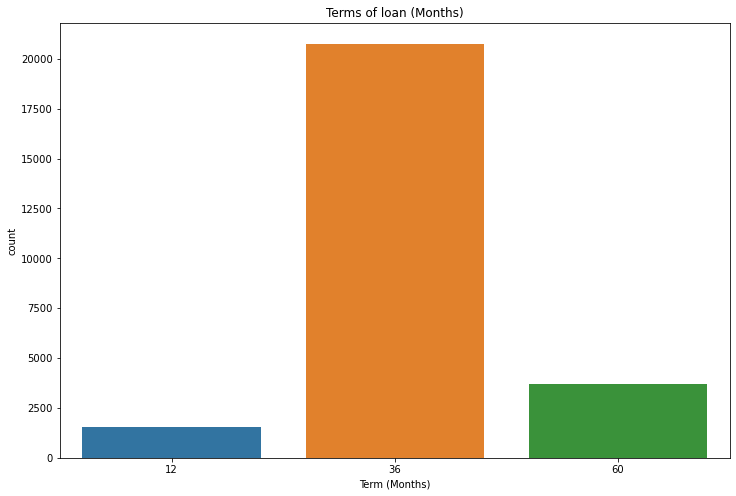

In [6]:
sns.countplot(data=loan_df,x= 'Term')
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

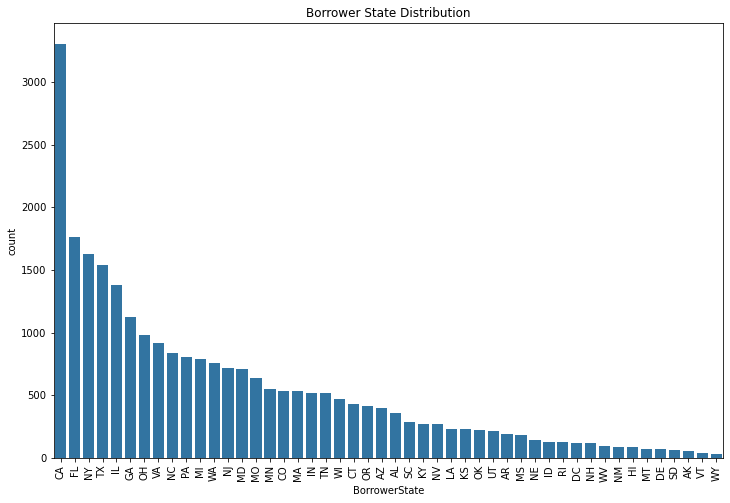

In [12]:
cat_order = loan_df['BorrowerState'].value_counts().index
sns.countplot(data=loan_df,x='BorrowerState',color=base_color, order=cat_order)
plt.title('Borrower State Distribution')
plt.xticks(rotation=90);

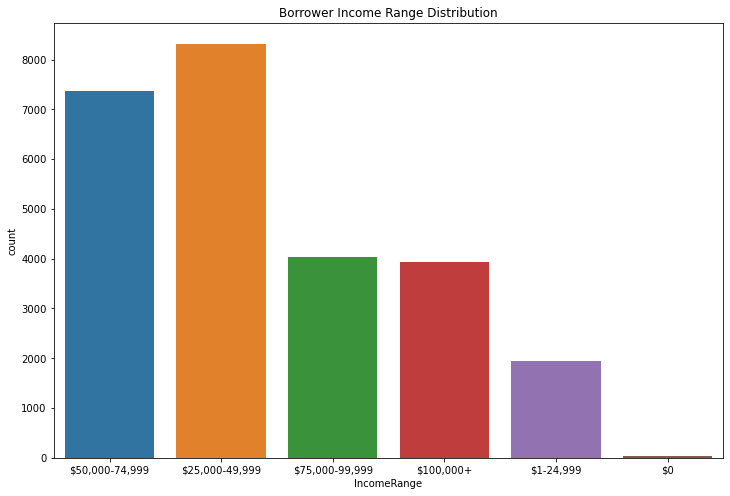

In [13]:
sns.countplot(data=loan_df,x='IncomeRange')
plt.title('Borrower Income Range Distribution');

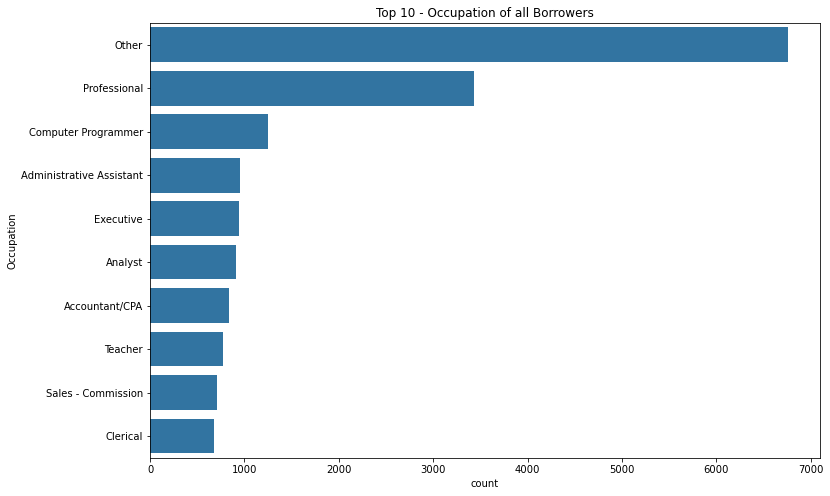

In [15]:
sns.countplot(data = loan_df, y = 'Occupation', color = base_color,
             order = loan_df['Occupation'].value_counts().head(10).index )
plt.title("Top 10 - Occupation of all Borrowers");

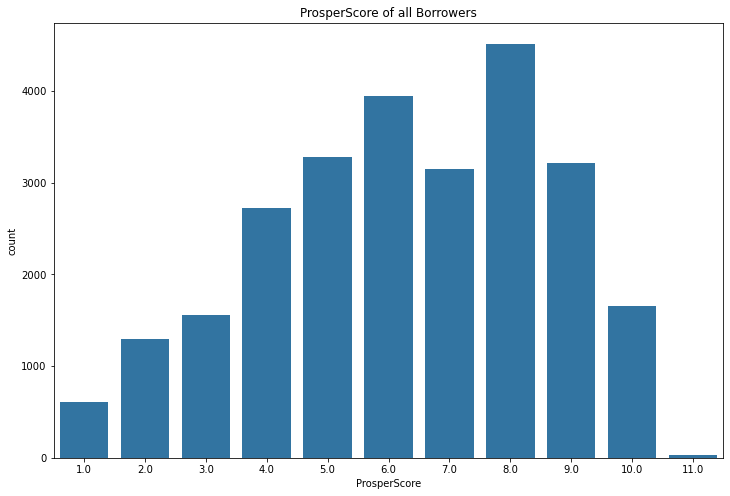

In [16]:
base_color = sns.color_palette()[0]
sns.countplot(data = loan_df, x = 'ProsperScore', color = base_color)
plt.title("ProsperScore of all Borrowers");